Please fill out:
* Student name:catherine wangui
* Student pace: full time
* Scheduled project review date/time: 22/3/2024
* Instructor name: Asha deen
* Blog post URL:

### MOVIE ANALYSIS

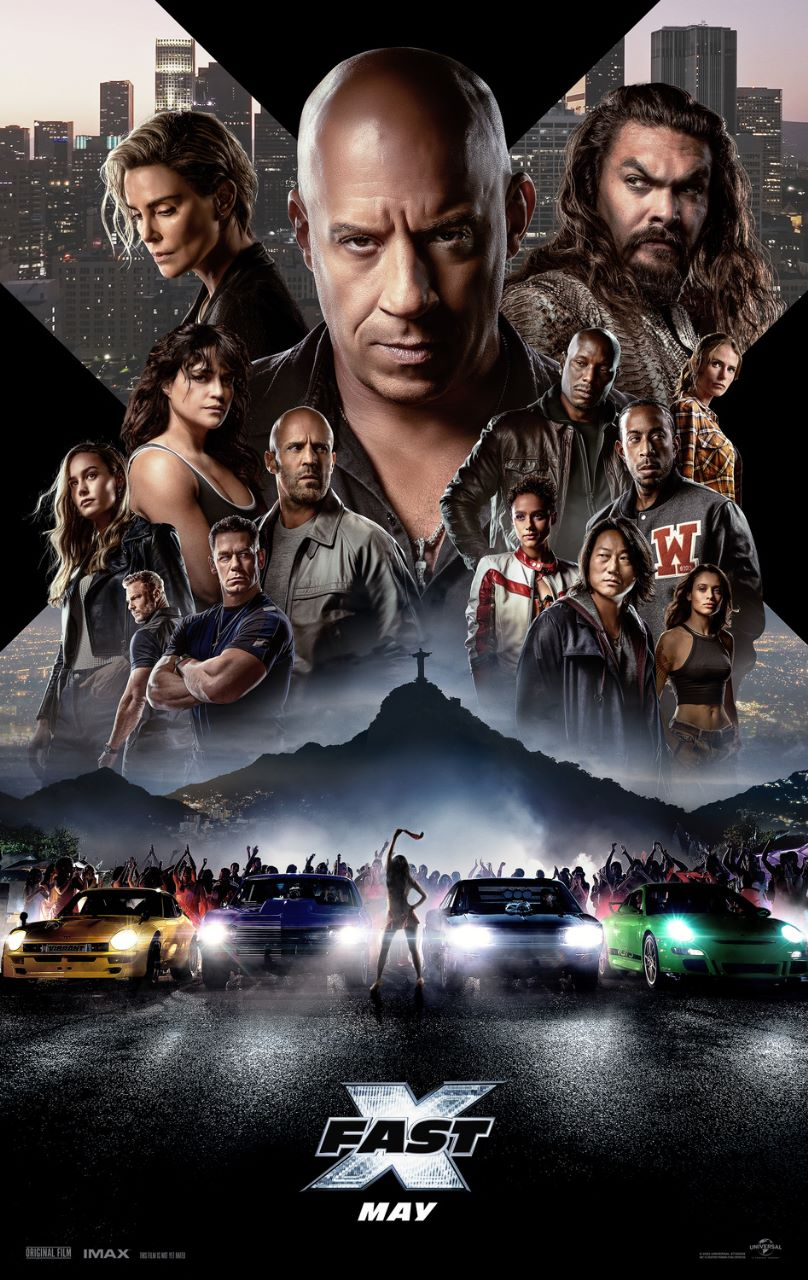

#### Overview
For this project, it will provide data analysis to generate insights on how new stakeholders can develop
ideas and make informed investments in the movie business:

#### Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun.
They have decided to create a new movie studio, but they don’t know anything about creating movies.
You are charged with exploring what types of films are currently doing the best at the box office. You
must then translate those findings into actionable insights that the head of Microsoft&#39;s new movie
studio can use to help decide what type of films to create.
the following steps should be considered before investing in a movie they will be as a follows:

- consider the ratings of a movie genre
- The Genre that is most watched
- Number of votes of a movie

### Data Understanding
The Data
Data to be used will be from:
- [Box Office Mojo](https://www.boxofficemojo.com/)
- [IMDB](https://www.imdb.com/)
- [Rotten Tomatoes](https://www.rottentomatoes.com/)
- [TheMovieDB](https://www.themoviedb.org/)
- [The Numbers](https://www.the-numbers.com/)

The MovieDB is a database.This is the ERD:

![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v2-4/master/movie_data_erd.jpeg)


### 1.LOAD DATA

In [6]:
# Import the neccesary library for analysis
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
# Connecting sqlite3 to imdb database
conn = sqlite3.connect("zippedData/im.db")

In [10]:
reviews = pd.read_csv("zippedData/rt.reviews.tsv", sep= '\t',encoding= 'latin1')
rt_movies = pd.read_csv("zippedData/rt.movie_info.tsv",delimiter = '\t')


2. #### Exploring dataframes

i.imdb Database

In [11]:
#viewing the list of tables in the imdb database
tables = pd.read_sql("""
SELECT name TableNames
FROM sqlite_master
WHERE type = 'table'
;
""",conn)
tables

,TableNames
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [13]:
# Viewing the Movie basics table
q1 = pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)
q1.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
# Viewing the movie ratings table
q2 = pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)
q2.head()



,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Movie basics can be joined with movie ratings on a common column 'movie_id'

In [16]:
df = pd.read_sql("""
SELECT* 
    FROM movie_basics
                 JOIN movie_ratings
                 USING(movie_id);""",conn)
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [18]:
# Determning the number of records in df dataframe
df.shape

(73856, 8)

In [19]:
# Checking the information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [20]:
# Prviewing the summary statistics of df
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


Genres and run time minutes have missing values in the df dataframe according to my observation

ii. rt_movies

In [22]:
# Getting the first five values of rt movies
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [23]:
# Determining the shape of rt_movies
rt_movies.shape

(1560, 12)

In [24]:
# Viewing the informaion of rt_movies
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [25]:
rt_movies.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In the rt_movies dataframe only the id column has none null values

iii. reviews

In [26]:
# Reading the movies dataframe
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [28]:
# Determining the number of rcords in reviews dataframe
reviews.shape

(54432, 8)

In [29]:
# Information for the reviews dataframe
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


review,rating,critic,publisher columns have null values

### 3.Data cleaning

in this section I will be cleaning data my removing null values,duplicates and outliers

 - Checkng for duplicates

In [73]:
# Removing all the duplicates
df.drop_duplicates(inplace =True)
rt_movies.drop_duplicates(inplace =True)
reviews.drop_duplicates(inplace =True)

In [31]:
# Confirming if there is any duplicates remaining
print(df.duplicated().sum())
print(rt_movies.duplicated().sum())
print(reviews.duplicated().sum())

0
0
0


- Checking for missing values

In [32]:
# Dropping all rows with missing values in the df, rt_movies and reviews dataframes
df.dropna(inplace= True)
reviews.dropna(inplace= True)

Dropping columns with more that half of its records being null values in rt_movies dataframe

In [33]:

rt_movies.drop(columns =["currency","box_office","studio"],inplace = True)

In [34]:
# Dropping the rows with null values in rt movies
rt_movies.dropna(inplace =True)

In [35]:
# Checking if there is any null values remaining in the dataframe
print(df.isna().sum().sum())
print(rt_movies.isna().sum().sum())
print(reviews.isna().sum().sum())

0
0
0


### 4.Merging Dataframes

In [74]:
#merging the two dataframes
merged_df = reviews.merge(rt_movies, how = 'inner',on = 'id')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26355 entries, 0 to 26354
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            26355 non-null  int64 
 1   review        26355 non-null  object
 2   rating_x      26355 non-null  object
 3   fresh         26355 non-null  object
 4   critic        26355 non-null  object
 5   top_critic    26355 non-null  int64 
 6   publisher     26355 non-null  object
 7   date          26355 non-null  object
 8   synopsis      26355 non-null  object
 9   rating_y      26355 non-null  object
 10  genre         26355 non-null  object
 11  director      26355 non-null  object
 12  writer        26355 non-null  object
 13  theater_date  26355 non-null  object
 14  dvd_date      26355 non-null  object
 15  runtime       26355 non-null  object
dtypes: int64(2), object(14)
memory usage: 3.2+ MB


### 4.Explanatory Data Analysis

- Exploring a new Feature called 'rating' to find out what genres are the most rated

In [36]:
#creating a new column that categorises the average rating into low or high rating
df['rating'] = ["High" if ((x >= 6) and (x <= 10)) 
                   else "Low" for x in df.averagerating]

In [39]:
# sorting the dataframe into number of votes
df.sort_values('numvotes', ascending = False, inplace = True)

#creating a dataframe where number of votes are greater than 1000
imdb1 = df.loc[df.numvotes > 1000]

#grouping data by genre and rating
genres = imdb1.groupby(['genres','rating'])['movie_id'].count()

#sorting the dataframe by high ratings
genres = genres.unstack().sort_values('High',ascending = False)[:10]


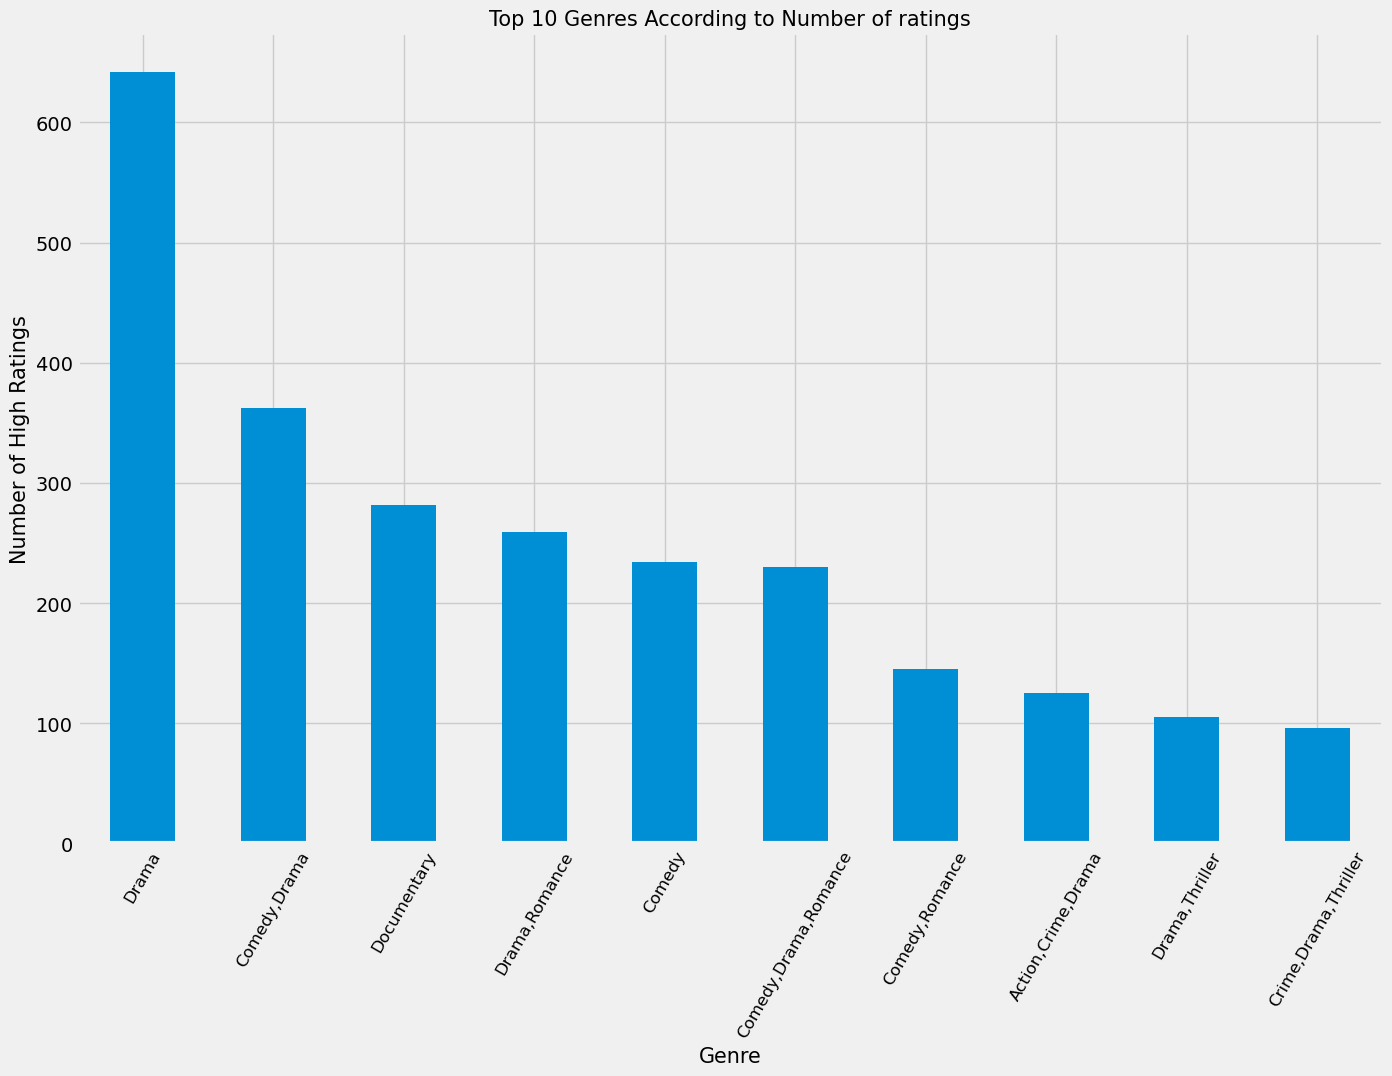

In [43]:
#plotting a bar graph of most popular genres
plt.style.use("fivethirtyeight")
fig,ax = plt.subplots(figsize=(15,10))

title = 'Top 10 Genres According to Number of ratings'
y_label = 'Number of High Ratings'
x_label = 'Genre'

genres.High.plot(kind = 'bar')
ax.set_title(title,fontsize=15)
ax.set_ylabel(y_label,fontsize=15)
ax.set_xlabel(x_label,fontsize=15)
plt.xticks(rotation = 60,fontsize=12);


Drama , comedy|Drama then Docuumentary is the most rated type of movie genre

In [45]:
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,rating
2387,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,High
2241,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,High
280,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,High
12072,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405,High
325,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,High


Most popular Genre according to the rating

In [59]:
# Finding the count of each rating
rt_ratings =merged_df.groupby('rating_y')['id'].count()
rt_ratings

rating_y
G          467
NR         913
PG        3668
PG-13     9545
R        11762
Name: id, dtype: int64

In [62]:
#sorting values by fresh rating
rt_ratings = rt_ratings.sort_values(ascending = False)

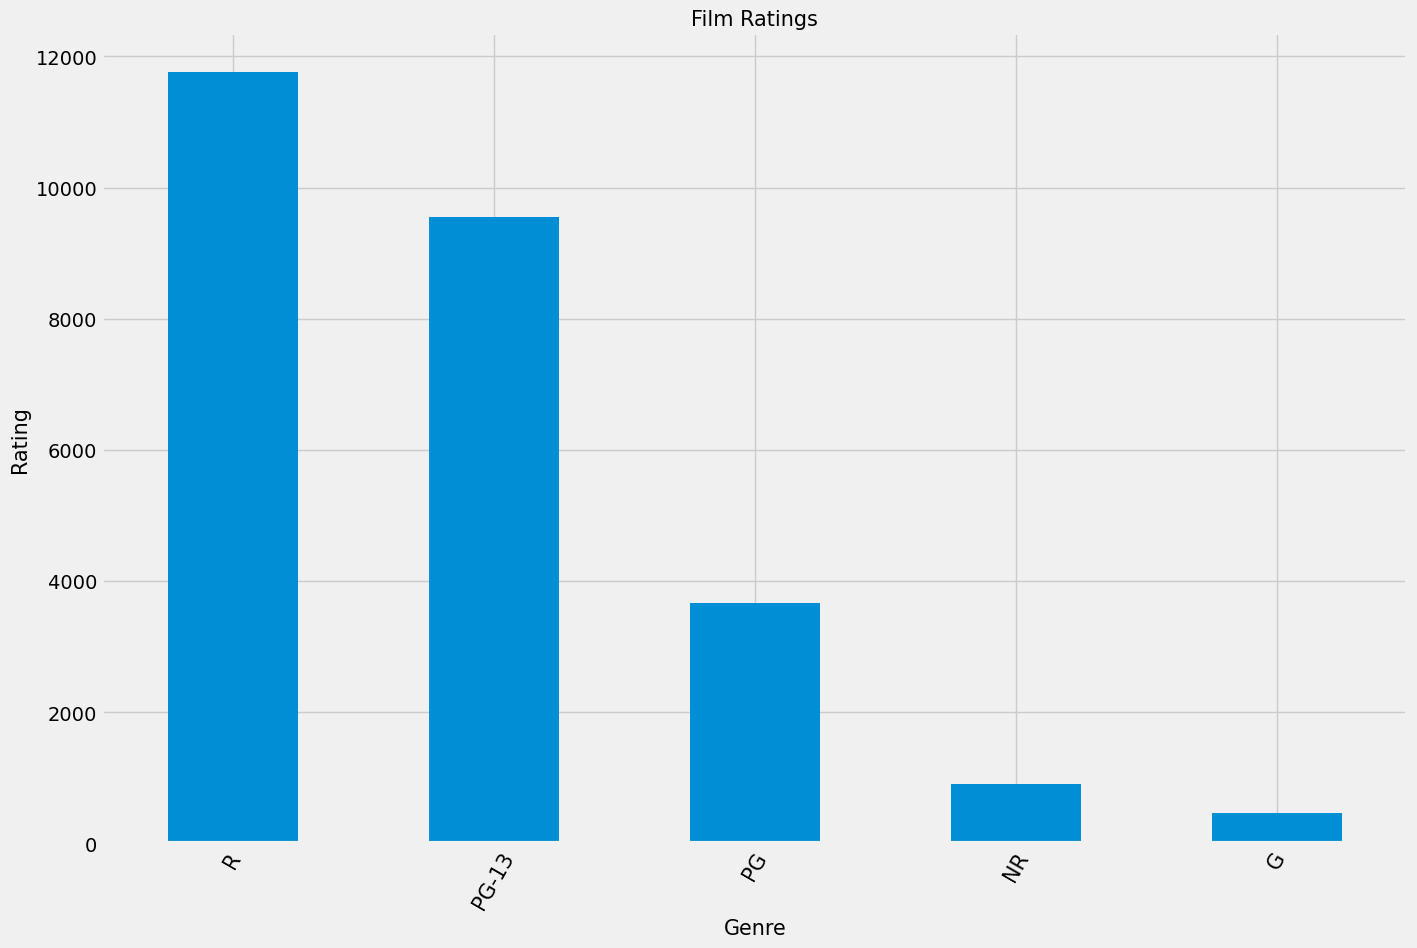

In [65]:
#plotting a bar graph of the ratings with the genres
fig,ax = plt.subplots(figsize=(15,10))

title = 'Film Ratings'
y_label = 'Rating'
x_label = 'Genre'

rt_ratings.plot(kind = 'bar')
ax.set_title(title,fontsize=15)
ax.set_ylabel(y_label,fontsize=15)
ax.set_xlabel(x_label,fontsize=15)
plt.xticks(rotation = 60,fontsize = 15);


I can conclude that movies with rating R should be produced most then followed by PG -13.

In [67]:
merged_df.head()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,runtime
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
1,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
3,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
4,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes


Get the most_watched movie_genre

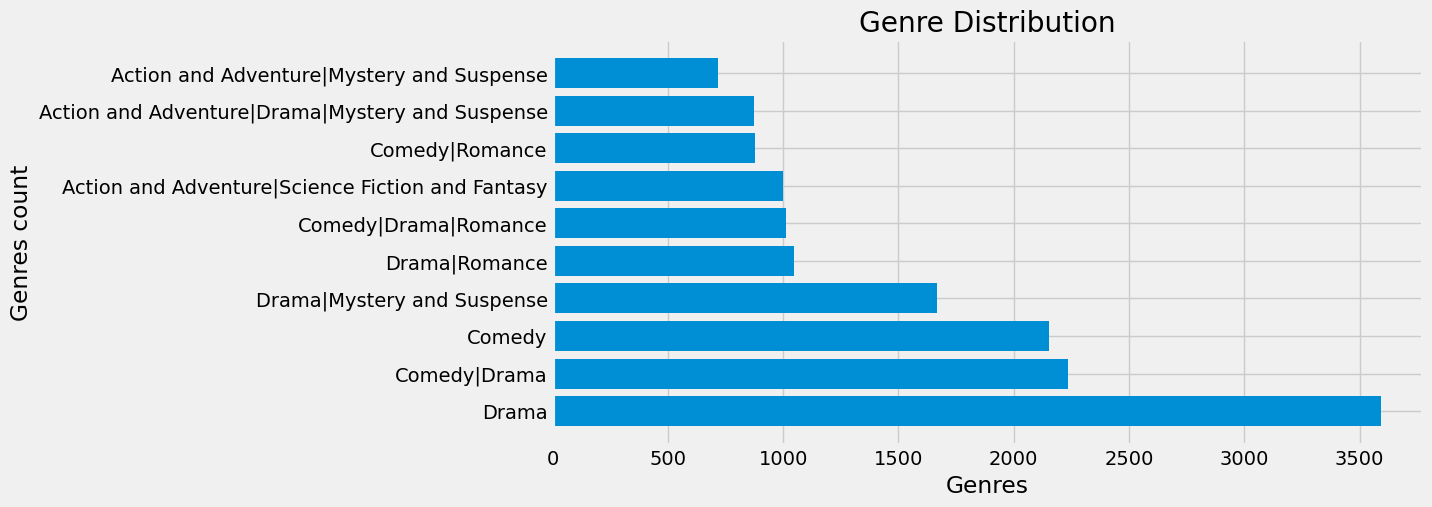

In [72]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
# Create variables for easier reuse
value_counts = merged_df["genre"].value_counts()
top_10_counts = value_counts.iloc[:10]

# Plot data
ax.barh(top_10_counts.index, top_10_counts.values)
ax.set_ylabel("Genres count")
ax.set_xlabel("Genres")
ax.set_title("Genre Distribution");

The most watched movie genre is Drama, Comedy|Drama,Comedy

### 5.Conclusion

This analysis has been able to provide answere that can lead to actionaable recommendations. From this findings the most popular movie genres are Drama, Comedy, Comedy Drama,R rated movies has been found the most popular, The genres which are  most rated are Drama,Comedy and Documentary

### 6.Reccomendations

1.I will recommend Microsoft to start producing movies based on    genres are Drama, Drama|Comedy and Documentary

2.I will recommend Microsft to start producing movies that are      R-rated and the PG-13 movies.Beacause they are the most popular

3. The most Popular movie genres are Drama, Comedy|Drama and Comedy
   focusing on this genres is likely to make microsoft successful
